## 文件读取

In [2]:
f = open("f:\\github\\lab-data-processing\\data\\Track-16th test in 2316_LH_12th test in 2316_LH_Averaging Interval=10_walk speed=4-Trial     2-Peltier 1-1-Subject 1 (1).txt","r")

In [3]:
import numpy as np
import pandas as pd


In [4]:
d = f.readlines()

In [5]:
#提取出标题所在行
headNumber = int(d[0][-5:-3])-2
print(headNumber)

d[36]

36


'"Trial time";"Recording time";"X center";"Y center";"Area";"Areachange";"Elongation";"Movement";"Hardware state";"Hardware state 2";"Acceleration";"Acceleration state";"Trial Control state";"Pretest";"Training";"Test";\n'

## 数据清洗

In [8]:
head = [j for i,j in enumerate(list(d[int(d[0][-5:-3])-2].split('"'))) if i%2 !=0 ]

In [9]:
print(head)

['Trial time', 'Recording time', 'X center', 'Y center', 'Area', 'Areachange', 'Elongation', 'Movement', 'Hardware state', 'Hardware state 2', 'Acceleration', 'Acceleration state', 'Trial Control state', 'Pretest', 'Training', 'Test']


In [10]:
d[36].split(";")[:-1]

['"Trial time"',
 '"Recording time"',
 '"X center"',
 '"Y center"',
 '"Area"',
 '"Areachange"',
 '"Elongation"',
 '"Movement"',
 '"Hardware state"',
 '"Hardware state 2"',
 '"Acceleration"',
 '"Acceleration state"',
 '"Trial Control state"',
 '"Pretest"',
 '"Training"',
 '"Test"']

In [11]:
dataFrame = {i:[] for i in head}
dataFrame

{'Acceleration': [],
 'Acceleration state': [],
 'Area': [],
 'Areachange': [],
 'Elongation': [],
 'Hardware state': [],
 'Hardware state 2': [],
 'Movement': [],
 'Pretest': [],
 'Recording time': [],
 'Test': [],
 'Training': [],
 'Trial Control state': [],
 'Trial time': [],
 'X center': [],
 'Y center': []}

In [12]:
dataFrame = {i:[] for i in head}
del dataFrame['Hardware state 2']
del dataFrame['Acceleration']
del dataFrame['Trial Control state']
del dataFrame['Acceleration state']
for i in d[headNumber+2:]:
    for index,data in zip(dataFrame,i.split(";")[:-1]):
        if data=='"-"':
            data=np.nan
        dataFrame[index].append(data)
        

In [13]:
bd = pd.DataFrame(dataFrame)

In [14]:
bd[0:2]

,Area,Areachange,Elongation,Hardware state,Movement,Pretest,Recording time,Test,Training,Trial time,X center,Y center
0,7.51872,2.63643,0.380359,0,NaN,1,0.000,0,0,0.000,-126.324,113.849
1,NaN,NaN,NaN,0,NaN,1,0.040,0,0,0.040,NaN,NaN


In [15]:
# >=每秒4mm  =>  movement               <=3.99  nomovement

In [16]:
filterData = bd[["Trial time","Hardware state","Movement"]]

In [17]:

filterData[filterData["Hardware state"]=="1"]
    
        

,Trial time,Hardware state,Movement
2369,94.760,1,0
2370,94.800,1,0
2371,94.840,1,0
2372,94.880,1,0
2373,94.920,1,0
2374,94.960,1,0
2375,95.000,1,0
2376,95.040,1,0
2377,95.080,1,0
2378,95.120,1,0


In [35]:
record = []
tempStart = 0
tempStop = 0
ifContinue = False

for i in range(21000):
    if ((filterData["Hardware state"].loc[i])=="1") & (not ifContinue):
        tempStart = i
        ifContinue = True
    if ((filterData["Hardware state"].loc[i])=="0") & (ifContinue):
        tempStop = i
        record.append([tempStart,tempStop])
        ifContinue = False
        
        
        
        
        
        

In [36]:
record

[[2369, 2420],
 [2846, 2892],
 [3673, 3720],
 [4043, 4083],
 [4199, 4207],
 [4567, 4589],
 [5294, 5324],
 [5707, 5768],
 [5995, 5999],
 [6640, 6658],
 [6731, 6740],
 [6834, 6893],
 [7229, 7246],
 [7464, 7484],
 [7745, 7785],
 [8288, 8289],
 [8594, 8633],
 [8908, 8955],
 [9054, 9063],
 [9410, 9467],
 [9689, 9709],
 [9913, 9918],
 [9979, 10004],
 [11112, 11121],
 [11383, 11455],
 [11550, 11570],
 [11621, 11699],
 [12096, 12103],
 [12261, 12275],
 [12346, 12380],
 [12638, 12718],
 [12758, 12810],
 [13143, 13168],
 [13255, 13293],
 [13361, 13363],
 [13663, 13694],
 [13740, 13750],
 [14151, 14196],
 [14259, 14278],
 [14675, 14678],
 [14986, 15003],
 [15069, 15176],
 [15862, 15935],
 [16043, 16071],
 [16104, 16111],
 [16442, 16457]]

## 数据分析

#### 坐标分析

In [47]:
import matplotlib.pyplot as plt

In [48]:
plt.plot(list(bd["X center"]),list(bd["Y center"]))

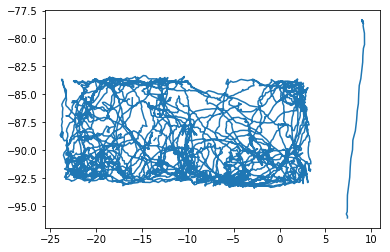

In [49]:
plt.show()

坐标偏好

In [50]:
maxX=np.max(bd["X center"].dropna())
minX=np.min(bd["X center"].dropna())
print(maxX,minX)

9.26326 -0.00530605


In [51]:
centerX = (float(maxX)+float(minX))/2
print(centerX)

4.6289769750000005


In [52]:
left=0
right=0
for i in bd["X center"].dropna():
    if float(i) >= centerX:
        right=right+1
    else:
        left=left+1
print(right)
print(left)

130
10296


In [63]:
## 数据筛选
print(bd.head())
PretestMovement = bd["Movement"][bd["Pretest"]=="1"].dropna()
len(PretestMovement)

     Area Areachange Elongation Movement Pretest Recording time Test Training  \
0  4.1497  0.0882915   0.577987      NaN       1          0.000    0        0   
1     NaN        NaN        NaN      NaN       1          0.040    0        0   
2     NaN        NaN        NaN      NaN       1          0.080    0        0   
3     NaN        NaN        NaN      NaN       1          0.120    0        0   
4  4.1497          0   0.577987      NaN       1          0.160    0        0   

  Trial time X center  Y center  
0      0.000  9.10518  -78.4956  
1      0.040      NaN       NaN  
2      0.080      NaN       NaN  
3      0.120      NaN       NaN  
4      0.160  9.10518  -78.4956  


1494

In [65]:
bd["Movement"][bd["Training"]=="1"].dropna()


1500    0
1501    0
1502    0
1503    0
1504    0
1505    0
1506    0
1507    0
1508    0
1509    0
1510    0
1511    0
1512    0
1513    0
1514    0
1515    0
1516    0
1517    0
1518    0
1519    0
1520    0
1521    0
1522    0
1523    0
1524    0
1525    0
1526    0
1527    0
1528    0
1529    0
       ..
7470    1
7471    1
7472    1
7473    1
7474    1
7475    1
7476    1
7477    1
7478    1
7479    1
7480    1
7481    1
7482    1
7483    1
7484    1
7485    1
7486    1
7487    1
7488    1
7489    1
7490    0
7491    0
7492    0
7493    0
7494    0
7495    0
7496    0
7497    0
7498    0
7499    0
Name: Movement, dtype: object

In [22]:
bd.loc[[1449]]

KeyError: 'None of [[1449]] are in the [index]'

In [23]:
bd.iloc[[1449]]

IndexError: positional indexers are out-of-bounds

In [24]:
bd.iloc[[1499:1500]]  # can't not use by this way

SyntaxError: invalid syntax (<ipython-input-24-1f2b6d8ddb3e>, line 1)

In [ ]:
bd